<a href="https://colab.research.google.com/github/adityapri/DL_01/blob/main/MT25012_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
## ✅ Complete notebook should run without errors within 90 minutes of colab compute.
## ✅ Rename the filename with your roll number. E.g. if your roll number is `MT24003` then rename the file `MT24003_a1.ipynb`.
## ✅ Write code only in the sections marked with `# YOUR CODE HERE`. No, you can NOT write code anywhere else.
## ✅ Download and extract the `data.zip` folder next to this file. If you extract it correctly, you will have a `data` folder next to this file.
## ❌ Do not modify any other function or class definitions; doing so may lead to the autograder failing to judge your submission, resulting in a zero.
## ❌ Deleting or adding new cells may lead to the `autograder` failing to judge your submission, resulting in a zero. Even if a cell is empty, do NOT delete it.
## ❌ Do NOT install / import any other libraries. You should be able to solve all the questions using only the libraries imported below.


In [16]:
!pip install torch==2.8.0 torchvision==0.23.0 torchaudio==2.8.0 -q
!pip install numpy==1.25.2 -q
!pip install soundfile==0.13.0 -q
!pip install torchcodec -q
!pip install pandas==2.2.3 -q
!pip install matplotlib==3.9.4 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 915.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 635.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/

In [1]:
!tar -xvzf data.tar.gz


Streaming output truncated to the last 5000 lines.
data/oxford-flowers-102/flowers-102/jpg/image_06449.jpg
data/oxford-flowers-102/flowers-102/jpg/image_06884.jpg
data/oxford-flowers-102/flowers-102/jpg/image_00550.jpg
data/oxford-flowers-102/flowers-102/jpg/image_00614.jpg
data/oxford-flowers-102/flowers-102/jpg/image_03536.jpg
data/oxford-flowers-102/flowers-102/jpg/image_07452.jpg
data/oxford-flowers-102/flowers-102/jpg/image_01890.jpg
data/oxford-flowers-102/flowers-102/jpg/image_02619.jpg
data/oxford-flowers-102/flowers-102/jpg/image_00338.jpg
data/oxford-flowers-102/flowers-102/jpg/image_05720.jpg
data/oxford-flowers-102/flowers-102/jpg/image_06286.jpg
data/oxford-flowers-102/flowers-102/jpg/image_02748.jpg
data/oxford-flowers-102/flowers-102/jpg/image_04526.jpg
data/oxford-flowers-102/flowers-102/jpg/image_01815.jpg
data/oxford-flowers-102/flowers-102/jpg/image_03089.jpg
data/oxford-flowers-102/flowers-102/jpg/image_02423.jpg
data/oxford-flowers-102/flowers-102/jpg/image_05353.j

In [ ]:
ls

data/  data_setup.md  data.tar.gz  sample_data/


In [2]:
import os
import json
import random
import timeit
from pathlib import Path
from typing import Tuple

import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchaudio
import scipy.io
from PIL import Image


In [3]:
PATH_TO_DATA_DIR = Path("/content/data")
PATH_TO_LIBRICOUNT_DIR = str(PATH_TO_DATA_DIR / "libricount")
PATH_TO_OXFORD102_DIR = str(PATH_TO_DATA_DIR / "oxford-flowers-102/flowers-102")


# `q1`: `Oxford 102 Flowers` and `LibriCount` Datasets and DataLoaders

* `q1a`: Write a PyTorch-compatible `Dataset` class to load the LibriCount dataset for speaker count classification **without using any pre-built PyTorch utilities like `torch.utils.data.Dataset`**. Each audio file has a matching JSON metadata file with `num_speakers` in the range 0-10. The dataset is split into 5 folds; use folds 00-03 for training and fold 04 for testing. Extract `libricount_fold00.tar` ... `libricount_fold04.tar` into `datasets/libricount/fold00` ... `datasets/libricount/fold04`. The dataset class should read audio files at a specified sampling rate and output a tuple containing the audio as a PyTorch tensor and its corresponding speaker count label. For the audio data in `LibriCount`, you need to convert the audio waveforms to spectrograms. You can use the `torchaudio` library to achieve this. Feel free to do so in either the `Dataset` here, or in the `DataLoader` in the next question, or in the `collate_fn` function in the `DataLoader` in the next question. Find where it fits best in terms of latency and efficiency.

* `q1b`: Write a PyTorch-compatible `Dataset` class to load the Oxford 102 Flowers dataset **without using any pre-built PyTorch utilities like `torch.utils.data.Dataset`**. Your task is to implement the functionality manually. The dataset class should read images from the jpg folder, load labels from `imagelabels.mat`, and use train/val/test splits from `setid.mat`. Output a tuple containing the image as a PyTorch tensor and its corresponding class label. The class label should be encoded as an integer value (e.g., 0, 1, 2, ..., 101) for all 102 flower classes. You can optionally limit to `num_classes` for faster training.
* `q1c`: Write a PyTorch-compatible `DataLoader` class to create batches of data **without using any pre-built PyTorch utilities like `torch.utils.data.DataLoader`**. The `DataLoader` should:
  1. Take in a dataset object (that has `__len__` and `__getitem__`) and create batches of data with a specified batch size.
  2. Support shuffling of the dataset at the start of each epoch if specified.
  3. Be **modality-agnostic**, meaning it should work with any dataset type (e.g., images, text, or audio), provided the dataset follows the requirements mentioned in `q1` and `q2`.
  4. Ensure batches are created such that:
     - The number of batches is determined by the dataset size and batch size.
     - Remaining samples (if any) form the last batch, even if the batch is smaller than the specified size.
  5. Implement collate functions for both the modalities. You may need to use padding to stack audio tensors of different lengths.
*
* `q1d`: Code to benchmark your implementation of `DataLoader` with PyTorch's `DataLoader` is given. Compare the times and optimize your implementation to reduce the time taken to load the data. You don't have to write any code for this question, just tweak your implementation in `q1a`, `q1b`, and `q1c` based on the benchmarking results.

`q1` Grading [Total: 1 point]:
1. `q1a`: 0.2 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
2. `q1b`: 0.2 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
3. `q1c`: 0.1 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
4. `q1d`: 0.5 points. You will be awarded points based on the time taken by your implementation compared to PyTorch's `DataLoader`. The points will be awarded based on the output of `generate_benchmark_report` function. The points will be awarded as follows:
   1. 10% or less: 0.5 points
   2. 11% to  20%: 0.4 points
   3. 21% to  30%: 0.3 points
   4. 31% to  40%: 0.2 points
   5. 41% to  50%: 0.1 points
   6. 51% or more: 0.0 points

You are provided with the following template. **Populate only the sections marked as `# YOUR CODE HERE`. Do not modify other parts of the template.**


In [ ]:
# # Self

# class LibriCountDataset:
#   def __init__(self, path_to_libricount_dataset, audio_sample_rate, train=True):
#     self.path_to_libricount_dataset = path_to_libricount_dataset
#     self.audio_sample_rate = audio_sample_rate


#     self.audio_samples = []

#     if train:
#       folds = ["fold_00","fold_01","fold_02","fold_03"]
#     else:
#       folds = ["fold_04"]

#     for fold in folds:
#       fold_path = os.path.join(self.path_to_libricount_dataset, fold)
#       for file in os.listdir(fold_path):
#         if file.endswith(".wav"):
#           audio_path = os.path.join(fold_path, file)
#           json_path = audio_path.replace(".wav", ".json")
#           self.audio_samples.append((audio_path, json_path))




#   def __len__(self):
#     return len(self.audio_samples)

#   def __getitem__(self, index):
#     audio_path, json_path = self.audio_samples[index]

#     audio, sample_rate = torchaudio.load(audio_path)

#     if sample_rate != self.audio_sample_rate:
#       audio = torchaudio.functional.resample(audio, sample_rate, self.audio_sample_rate)


#     # Spectrogram Conversion
#     spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(audio)
#     # print(spectrogram.shape)
#     spectrogram = spectrogram.squeeze(0)
#     # print(spectrogram.shape)

#     with open (json_path, "r") as f:
#       data = json.load(f)
#       speaker_count = data["num_speakers"]

#     # print("Type of Spec: ",type(spectrogram))
#     # print(type(speaker_count))

#     return (spectrogram, speaker_count)






## `q1a`: LibriCount Dataset (Speaker Count)


In [4]:
# q1a


class LibriCountDataset:
    def __init__(
        self, path_to_libricount_dataset, audio_sample_rate, train=True
    ):
        """
        Initialize the dataset for speaker count classification.

        Args:
            path_to_libricount_dataset (str): Path to the libricount dataset root (folders fold00 to fold04).
            audio_sample_rate (int): Sample rate to resample audio to.
            train (bool): If True, use folds 00-03; if False, use fold 04.
        """

        ### YOUR SOLUTION HERE
        self.path_to_libricount_dataset = path_to_libricount_dataset
        self.audio_sample_rate = audio_sample_rate


        self.audio_samples = []

        if train:
          folds = ["fold_00","fold_01","fold_02","fold_03"]
        else:
          folds = ["fold_04"]

        for fold in folds:
          fold_path = os.path.join(self.path_to_libricount_dataset, fold)
          for file in os.listdir(fold_path):
            if file.endswith(".wav"):
              audio_path = os.path.join(fold_path, file)
              json_path = audio_path.replace(".wav", ".json")
              self.audio_samples.append((audio_path, json_path))



    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        ### YOUR SOLUTION HERE
        return len(self.audio_samples)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        """
        Retrieve the audio tensor and its speaker count label for a given index.

        Args:
            index (int): Index of the sample to retrieve.

        Returns:
            (torch.Tensor, int): Tuple containing the audio tensor and its speaker count label.
        """
        ### YOUR SOLUTION HERE
        audio_path, json_path = self.audio_samples[index]

        audio, sample_rate = torchaudio.load(audio_path)

        if sample_rate != self.audio_sample_rate:
          audio = torchaudio.functional.resample(audio, sample_rate, self.audio_sample_rate)


        # Spectrogram Conversion
        spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(audio)
        # print(spectrogram.shape)
        spectrogram = spectrogram.squeeze(0)
        # print(spectrogram.shape)

        with open (json_path, "r") as f:
          data = json.load(f)
          speaker_count = data["num_speakers"]

        # print("Type of Spec: ",type(spectrogram))
        # print(type(speaker_count))

        return (spectrogram, speaker_count)



In [ ]:
# tests for q1a
train_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=True,
)

del train_libricount_dataset


In [5]:
# tests for q1a
test_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=False,
)


del test_libricount_dataset

## `q1b`: Oxford 102 Flowers Dataset

In [6]:
import os
from typing import Tuple
import torch
from PIL import Image
import torchvision.transforms as T
from scipy.io import loadmat


class Oxford102FlowersDataset:
    def __init__(self, path_to_dataset, split="train", num_classes=None, image_size=(64, 64)):
        """
        path_to_dataset:
        data/oxford-flowers-102/flowers-102
        """

        self.samples = []

        # Paths
        images_dir = os.path.join(path_to_dataset, "jpg")
        labels_path = os.path.join(path_to_dataset, "imagelabels.mat")
        split_path = os.path.join(path_to_dataset, "setid.mat")

        # Load .mat files
        labels_mat = loadmat(labels_path)
        split_mat = loadmat(split_path)

        # Labels: convert from 1-based → 0-based
        labels = labels_mat["labels"][0] - 1  # shape: (8189,)

        # Select split indices
        if split == "train":
            indices = split_mat["trnid"][0] - 1
        elif split == "val":
            indices = split_mat["valid"][0] - 1
        elif split == "test":
            indices = split_mat["tstid"][0] - 1
        else:
            raise ValueError("split must be 'train', 'val', or 'test'")

        # Build sample list
        for idx in indices:
            label = labels[idx]

            if num_classes is not None and label >= num_classes:
                continue

            image_name = f"image_{idx+1:05d}.jpg"
            image_path = os.path.join(images_dir, image_name)

            self.samples.append((image_path, int(label)))

        # Image transforms
        self.transform = T.Compose([
            T.Resize(image_size),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        image_path, label = self.samples[index]

        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)

        return image, label


In [ ]:
# q1b


class Oxford102FlowersDataset:
    def __init__(self, path_to_dataset, split="train", num_classes=None, image_size=(64, 64)):
        """
        Initialize the dataset.

        Args:
            path_to_dataset (str): Path to the Oxford 102 Flowers dataset directory.
            split (str): One of "train", "val", or "test".
            num_classes (int, optional): Limit to first N classes for faster training. If None, use all 102.
            image_size (tuple): Target size for images (height, width).
        """
        ### YOUR SOLUTION HERE

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        ### YOUR SOLUTION HERE

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        """
        Retrieve the image tensor and its class label for a given index.

        Args:
            index (int): Index of the sample to retrieve.

        Returns:
            (torch.Tensor, int): A tuple containing the image tensor (C, H, W) and label.
        """
        ### YOUR SOLUTION HERE


In [7]:
# tests for q1b
train_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="train",
    num_classes=20,  # Limit to 20 classes for faster training
)
print(len(train_oxford102_dataset))
# del train_oxford102_dataset

200


In [8]:
# tests for q1b
test_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="val",
    num_classes=20,  # Limit to 20 classes for faster training
)
print(len(test_oxford102_dataset))
# del test_oxford102_dataset

200


## `q1c`: DataLoader

In [24]:
# q1c


class DataLoader:
    def __init__(self, dataset, collate_fn, batch_size=1, shuffle=False):
        """
        Custom DataLoader implementation.

        Args:
            dataset (Dataset): The dataset to load data from.
            batch_size (int): Number of samples per batch.
            shuffle (bool): Whether to shuffle the dataset at the start of each epoch.
            collate_fn (callable): Function to collate samples into batches.
        """
        ### YOUR SOLUTION HERE
        self.dataset = dataset
        self.collate_fn = collate_fn
        self.batch_size = batch_size
        self.shuffle = shuffle


        self.indices = list(range(len(dataset)))


        self.current_idx = 0

    def __iter__(self):
        """
        Creates an iterator over the dataset.

        Returns:
            DataLoader: The instance itself, prepared for iteration.
        """
        ### YOUR SOLUTION HERE
        self.current_idx = 0

        if self.shuffle:
            random.shuffle(self.indices)

        return self

    def __next__(self):
        """
        Fetch the next batch of data.

        Returns:
            A batch of samples collated by `collate_fn`.

        Raises:
            StopIteration: When all samples have been consumed.
        """
        ### YOUR SOLUTION HERE
        if self.current_idx >= len(self.indices):
          raise StopIteration

        start_idx = self.current_idx

        end_idx = min(self.current_idx + self.batch_size, len(self.indices))

        batch_indices = self.indices[start_idx:end_idx]

        batch_samples = [self.dataset[idx] for idx in batch_indices]

        batch = self.collate_fn(batch_samples)

        self.current_idx = end_idx

        return batch


    def __len__(self):
        """
        Returns the number of batches per epoch.

        Returns:
            int: Total number of batches.
        """
        ### YOUR SOLUTION HERE
        return len(self.indices) // self.batch_size



def speech_collate_fn(batch):
    """
    Default collate function to stack tensors into a batch.
    You may need to use padding to stack audio tensors of different lengths.

    Args:
        batch (list): A list of tuples (data, label).

    Returns:
        tuple: A tuple of stacked data and label tensors.
    """
    ### YOUR SOLUTION HERE

    #Let's unzip first
    specs, labels = zip(*batch)

    #get the max time from [freq,time] amoung specs
    max_time = max(spec.shape[1] for spec in specs)

    padded_specs = []

    for spec in specs:

      freq, time = spec.shape
      # pad_length = max_time - time

      # padded_spec = torch.nn.functional.pad(spec, (0, pad_length))

      padded_spec = torch.zeros(freq, max_time)

      padded_spec[:, :time] = spec

      padded_specs.append(padded_spec)

    specs_tensor = torch.stack(padded_specs)

    labels_tensor = torch.tensor(labels, dtype=torch.long)

    return specs_tensor, labels_tensor




def image_collate_fn(batch):
    """
    Default collate function to stack tensors into a batch.

    Args:
        batch (list): A list of tuples (data, label).

    Returns:
        tuple: A tuple of stacked data and labels tensors.
    """
    ### YOUR SOLUTION HERE
    images, labels = zip(*batch)

    image_tensors = torch.stack(images)

    labels_tensor = torch.tensor(labels, dtype=torch.long)

    return image_tensors, labels_tensor


In [25]:
# tests for q1c

train_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=True,
)

train_libricount_dataloader = DataLoader(
    dataset=train_libricount_dataset,
    collate_fn=speech_collate_fn,
    batch_size=4,
    shuffle=False,
)

del train_libricount_dataloader

In [26]:
# tests for q1c

train_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="train",
    num_classes=20,  # Limit to 20 classes for faster training
)

train_oxford102_dataloader = DataLoader(
    dataset=train_oxford102_dataset,
    collate_fn=image_collate_fn,
    batch_size=4,
    shuffle=False,
)

del train_oxford102_dataloader

## `q1d`: Benchmarking

In [27]:
def run_dataloader_benchmark(datset, collate_fn, dataloader_class):
    dataloader = dataloader_class(
        dataset=datset, collate_fn=collate_fn, batch_size=64, shuffle=True
    )
    num_runs = 10
    time = timeit.timeit(lambda: list(iter(dataloader)), number=num_runs)
    return time


def generate_benchmark_report(dataset, custom_dataloader_class, collate_fn):
    pytorch_dataloader_time = run_dataloader_benchmark(
        dataset, collate_fn, torch.utils.data.DataLoader
    )
    custom_dataloader_time = run_dataloader_benchmark(
        dataset, collate_fn, custom_dataloader_class
    )

    if custom_dataloader_time < pytorch_dataloader_time:
        print(
            f"Your DataLoader is faster than PyTorch DataLoader: {custom_dataloader_time:.2f}s < {pytorch_dataloader_time:.2f}s"
        )

    elif custom_dataloader_time > pytorch_dataloader_time:
        slow_percentage = (
            (custom_dataloader_time - pytorch_dataloader_time) / custom_dataloader_time
        ) * 100
        print(
            f"Your DataLoader is {slow_percentage:.2f}% slower than PyTorch DataLoader: {custom_dataloader_time:.2f}s > {pytorch_dataloader_time:.2f}s"
        )

In [28]:
# tests for q1d

train_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=True,
)

generate_benchmark_report(
    train_libricount_dataset, DataLoader, speech_collate_fn
)

del train_libricount_dataset

/usr/local/lib/python3.12/dist-packages/torchaudio/functional/functional.py:582: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  fb *= enorm.unsqueeze(0)


Your DataLoader is faster than PyTorch DataLoader: 759.86s < 763.88s


In [29]:
# tests for q1d

train_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="train",
    num_classes=20,  # Limit to 20 classes for faster training
)

generate_benchmark_report(
    train_oxford102_dataset, DataLoader, image_collate_fn
)

del train_oxford102_dataset

Your DataLoader is faster than PyTorch DataLoader: 9.24s < 11.30s


# `q2`: `MLP` Model
* `q2a`: Implement a multi-layer perceptron (MLP) model using PyTorch. Your goal is to minimize the width, depth, and count parameters while maximizing the model's performance on the test set of `LibriCount Speaker Count` datasets. The model must satisfy the following constraints:
    1. Should be a simple feed-forward neural network (MLP).
    2. Maximum width: 512
    3. Maximum depth: 100
    4. Maximum epochs: 50
    5. Any activation function of your choice.
    6. The model should be designed for classification, i.e., the output should represent logits for each class.

* `q2b`: Implement a multi-layer perceptron (MLP) model using PyTorch. Your goal is to minimize the width, depth, and count parameters while maximizing the model's performance on the test set of `Oxford 102 Flowers` datasets. The model must satisfy the following constraints:
    1. Should be a simple feed-forward neural network (MLP).
    2. Maximum width: 512
    3. Maximum depth: 100
    4. Maximum epochs: 50
    5. Any activation function of your choice.
    6. The model should be designed for classification, i.e., the output should represent logits for each class.

**Your best performance may come at a minimum which might be among class maximum.**

* `q2c`: You are provided with a skeleton code for the training loop. Your task is to complete the missing parts of the code to make the training loop work. This function will be used to train the models in `q2a`, `q2b`, `q3a`, and `q3b`. Specifically, you need to implement the following:
  1. **Training Loop**:
     - Zero gradients before the backward pass.
     - Perform a forward pass through the model.
     - Compute the loss using a suitable loss function.
     - Perform backpropagation (calculate gradients).
     - Update the model's parameters using an optimizer.   
  2. **Validation Loop**:
     - Perform a forward pass through the model on the validation data.
     - Calculate the loss and accuracy on the validation dataset.
  3. **Plotting**:
     - Plot the training and validation losses over the epochs.
     - Plot the training and validation accuracies over the epochs.
* `q2d`: Train the models in `q2a` and `q2b` using the training loop implemented in `q2c` and the dataloaders from `q1`. You don't have to write any code for this question, just optimize your implementation in `q2a`, `q2b`, and `q2c` based on the validation accuracy of the models.

`q2` Grading [Total: 2 point]:
1. `q2a`: 0.15 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
2. `q2b`: 0.15 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
3. `q2c`: 0.2 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
4. `q2d`: 1.5 points. You will be awarded points based on the validation accuracy of the models.
   1. For `MLP4LibriCount`:
      WILL BE DECLARED ON GC
   2. For `MLP4Oxford102`:
      WILL BE DECLARED ON GC

You are provided with the following template. **Populate only the sections marked as `# YOUR CODE HERE`. Do not modify other parts of the template.**

## `q2a`: MLP for LibriCount Speaker Count Dataset

In [ ]:
# q2a


class MLP4LibriCount(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        """
        Multi-Layer Perceptron for LibriCount Speaker Count Classification.

        Args:
            input_dim (int): Dimension of the input features.
            num_classes (int): Number of classes for classification.
        """
        super(MLP4LibriCount, self).__init__()
        ### YOUR SOLUTION HERE

    def forward(self, x):
        """
        Forward pass for the model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, input_dim).

        Returns:
            torch.Tensor: Logits of shape (batch_size, num_classes).
        """
        ### YOUR SOLUTION HERE


In [ ]:
# tests for q2a


## `q2b`: MLP for Oxford 102 Flowers Dataset

In [ ]:
# q2b


class MLP4Oxford102(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        """
        Multi-Layer Perceptron for Oxford102Flowers Image Classification.

        Args:
            input_dim (int): Dimension of the input features.
            num_classes (int): Number of classes for classification.
        """
        super(MLP4Oxford102, self).__init__()
        ### YOUR SOLUTION HERE

    def forward(self, x):
        """
        Forward pass for the model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, input_dim).

        Returns:
            torch.Tensor: Logits of shape (batch_size, num_classes).
        """
        ### YOUR SOLUTION HERE


In [ ]:
# tests for q2b


## `q2c`: Training Loop Function

In [ ]:
# q2c


def train(
    model, train_loader, val_loader, num_epochs=10, lr=0.001, plot_save_path=None, task_type='regression'
):
    """
    A simple training loop.

    Args:
        model (torch.nn.Module): The model to train.
        train_loader (DataLoader): The DataLoader for the training set.
        val_loader (DataLoader): The DataLoader for the validation set.
        num_epochs (int): The number of epochs to train for.
        lr (float): The learning rate for the optimizer.
        plot_save_path (str or None): Path to save the loss plot. If None, the plot will not be saved.
        task_type (str): Type of task, either 'regression' or 'classification', used to choose the appropriate loss function.
    Returns:
        None: This function will print the losses and plot them.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            model_outputs = None
            loss = None
            ### YOUR SOLUTION HERE

            train_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            _, predicted = torch.max(model_outputs, 1)  # Get the predicted class
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        # bookkeeping of losses
        avg_train_loss = train_loss / total_train
        train_losses.append(avg_train_loss)

        # Validation loop
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():  # No need to calculate gradients for validation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                model_outputs = None
                ### YOUR SOLUTION HERE
                val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
                _, predicted = torch.max(model_outputs, 1)  # Get the predicted class
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        avg_val_loss = val_loss / total_val
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(
            f"Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}"
        )

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        print(f"Training Accuracy: {train_accuracy:.2f}%")

        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

    # Plot the losses and accuracies accross epochs in 2 subplots
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Loss per Epoch")
    ### YOUR SOLUTION HERE

    plt.subplot(1, 2, 2)
    plt.title("Accuracy per Epoch")
    ### YOUR SOLUTION HERE

    if plot_save_path:
        plt.savefig(plot_save_path)
    plt.show()

In [ ]:
# tests for q2c


In [ ]:
# tests for q2c


## `q2d`: Training

In [ ]:
# tests for q2d

batch_size: int
num_epochs: int
mlp_input_dim: int
learning_rate: float
example_hyper_parameter: int

# Define the hyperparameters
# example_hyper_parameter = 1024 # example: this is how you should define the hyperparameters
### YOUR SOLUTION HERE

assert num_epochs <= 50, "num_epochs should be less than or equal to 50"

train_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=True,
)

test_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=False,
)


train_libricount_dataloader = DataLoader(
    dataset=train_libricount_dataset,
    collate_fn=speech_collate_fn,
    batch_size=batch_size,
    shuffle=True,
)

test_libricount_dataloader = DataLoader(
    dataset=test_libricount_dataset,
    collate_fn=speech_collate_fn,
    batch_size=batch_size,
    shuffle=False,
)

mlp_model = MLP4LibriCount(input_dim=mlp_input_dim, num_classes=11)

train(
    mlp_model,
    train_libricount_dataloader,
    test_libricount_dataloader,
    num_epochs=num_epochs,
    lr=learning_rate,
    plot_save_path=None,
    task_type='regression'
)

In [ ]:
# tests for q2d

batch_size: int
num_epochs: int
mlp_input_dim: int
learning_rate: float
example_hyper_parameter: int

# Define the hyperparameters
# example_hyper_parameter = 1024 # example: this is how you should define the hyperparameters
### YOUR SOLUTION HERE

assert num_epochs <= 50, "num_epochs should be less than or equal to 50"

train_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="train",
    num_classes=20,  # Limit to 20 classes for faster training
)
train_oxford102_dataloader = DataLoader(
    dataset=train_oxford102_dataset,
    collate_fn=image_collate_fn,
    batch_size=batch_size,
    shuffle=True,
)

test_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="val",
    num_classes=20,  # Limit to 20 classes for faster training
)
test_oxford102_dataloader = DataLoader(
    dataset=test_oxford102_dataset,
    collate_fn=image_collate_fn,
    batch_size=batch_size,
    shuffle=False,
)

mlp_model = MLP4Oxford102(input_dim=mlp_input_dim, num_classes=20)

train(
    mlp_model,
    train_oxford102_dataloader,
    test_oxford102_dataloader,
    num_epochs=num_epochs,
    lr=learning_rate,
    plot_save_path=None,
    task_type='classification'
)

# `q3`: `CNN` Model

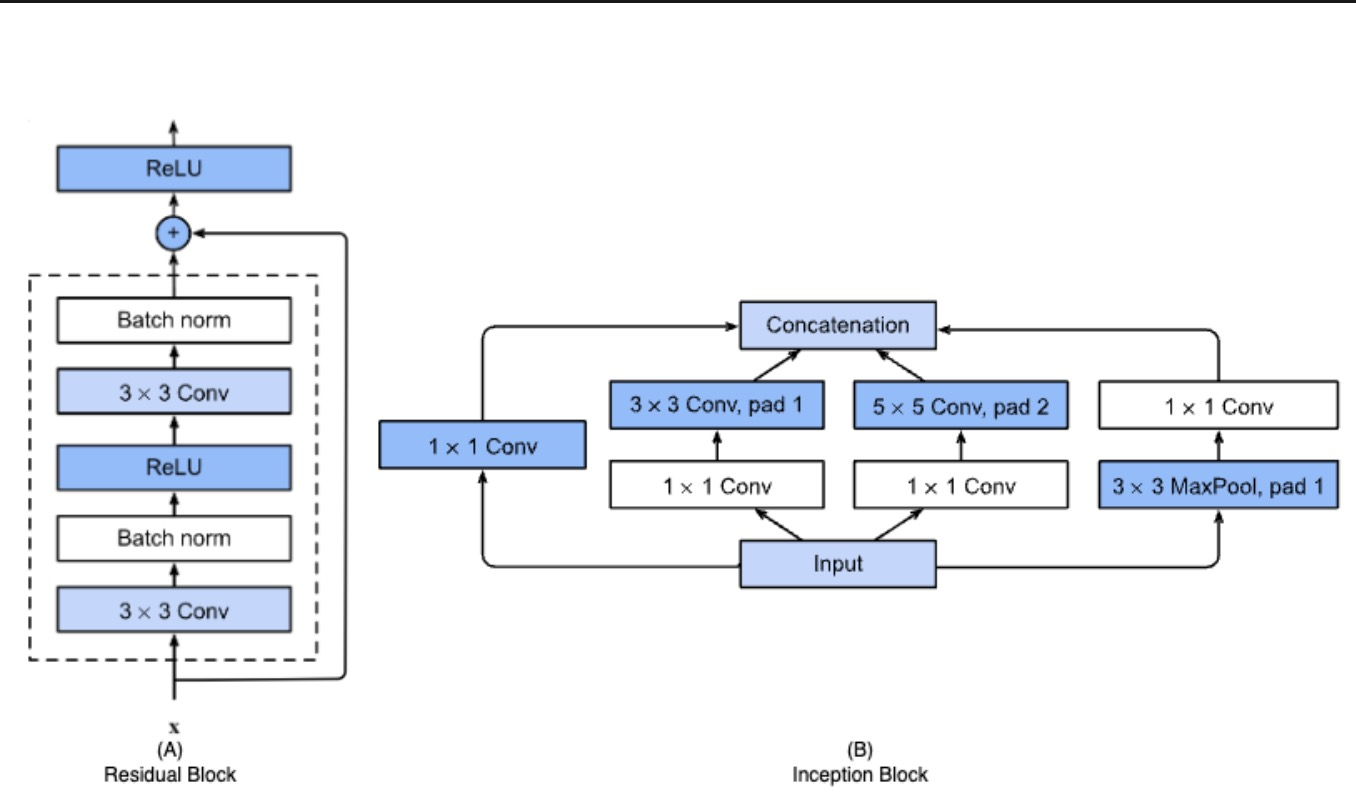

## (C)

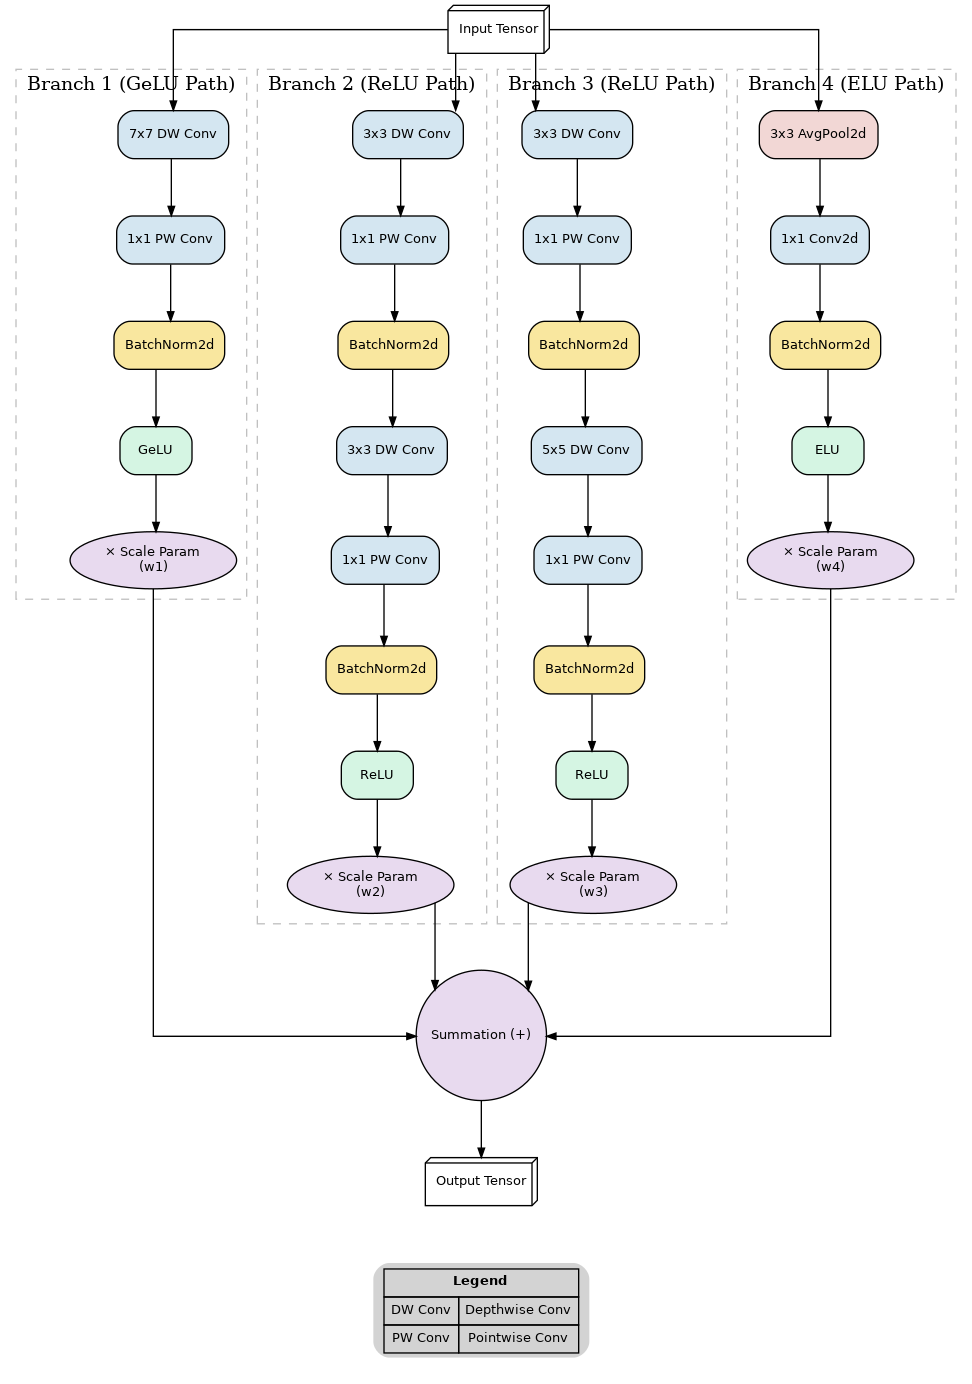


### ResNet Block
In the figure, (A) represents a single `ResNet` block. The `Residual` / `ResNet` block in ResNet models consists of two 3x3 Conv layers with Batch Norm and ReLU activation. The block adds the input (`X`) to the processed output of the layers in the dotted box, creating a shortcut that facilitates effective training in deep networks. This skip connection helps address vanishing gradient issues. You can read more about `ResNet Blocks` here: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385).

### Inception Block
In the figure, (B) represents a single `Inception` block. The `Inception` block uses four branches to process input in parallel. Branch 1 consists of a single 1x1 Conv. Branch 2 applies a 1x1 Conv followed by a 3x3 Conv. Branch 3 uses a 1x1 Conv followed by a 5x5 Conv. Branch 4 performs 3x3 Max Pooling followed by a 1x1 Conv. The outputs from all branches are concatenated along the channel dimension, enabling multi-scale feature extraction. You can read more about `Inception Blocks` here: [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842).

* `q3a`: Implement the `CustomInceptionBlock` class as shown in the the figure (C). You need to find apt padding values for each convolution layer so that the input and output tensor have the same shape.

* `q3b`: CNN for LibriCount Speaker Count
  1. Design a custom network using the following combination of blocks, adhering to configurations shown in the figure above.
  2. Network Architecture
     1. **Input Layer**
     2. **Residual Block × 2**
     3. **Inception Block × 2**
     4.  **Classification Network**
         - The **Classification Network** refers to a combination of either `nn.Linear` or `nn.Conv2d` layer that produce logits for the classification task.
  3. Constraints
     * Apart from the modules mentioned above, you can use `torch.nn.BatchNorm2d`, `torch.nn.Dropout`, and any activation functions.
     * The input to this network must be a spectrogram, and the output must be a speaker count label. You can not pass in a raw waveform as input.
     * The network must strictly follow the architecture defined above.
     * You can train the NN to a maximum of 50 epochs.
     * Either Implement the `ResNetBlock` and `InceptionBlock` from scratch using the figure as reference or use pre-built PyTorch modules for these blocks.

* `q3c`: CNN for Oxford102Flowers
  1. Design a custom network using the following combination of blocks, adhering to configurations shown in the figure above.
  2. Network Architecture
     1. **Input Layer**
     2. **Residual Block × 2**
     3. **Inception Block × 2**
     4.  **Classification Network**
         - The **Classification Network** refers to a combination of either `nn.Linear` or `nn.Conv2d` layer that produce logits for the classification task.
  3. Constraints
     * Apart from the modules mentioned above, you can use `torch.nn.BatchNorm2d`, `torch.nn.Dropout`, and any activation functions.
     * The input to this network must be a Oxford102Flowers image, and the output must be a class label.
     * The network must strictly follow the architecture defined above.
     * You can train the NN to a maximum of 50 epochs.
     * Either Implement the `ResNetBlock` and `InceptionBlock` from scratch using the figure as reference or use pre-built PyTorch modules for these blocks.

* `q3d`: Train the models in `q3a` and `q3b` using the training loop implemented in `q3c` and the dataloaders from `q1`. You don't have to write any code for this question, just tweak your implementation in `q3a`, `q3b`, and `q3c` based on the validation accuracy of the models.

`q3` Grading [Total: 2 point]:
1. `q3a`: `CustomInceptionBlock` 0.2 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
2. `q3b`: 0.15 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
3. `q3c`: 0.15 points if the code runs without any errors on hidden test cases, otherwise 0 points. No partial points for this question.
4. `q3d`: 1.5 points. You will be awarded points based on the validation accuracy of the models.
   1. For `MLP4LibriCount`:
      WILL BE DECLARED ON GC
   2. For `MLP4Oxford102`:
      WILL BE DECLARED ON GC

You are provided with the following template. **Populate only the sections marked as `# YOUR CODE HERE`. Do not modify other parts of the template.**

## `q3a`: `CustomInceptionBlock` Implementation

In [ ]:
class CustomInceptionBlock2D(torch.nn.Module):
    def __init__(self, input_channels, output_channels):
        super(CustomInceptionBlock2D, self).__init__()
        ### YOUR SOLUTION HERE

    def forward(self, x):
        ### YOUR SOLUTION HERE

In [ ]:
# Test for q3a


## `q3b`: CNN for LibriCount Speaker Count Dataset

In [ ]:
# Use this code cell to paste your implementation of the ResNetBlock and InceptionBlock classes
# NOTE: these implementations are not graded but will be used in the subsequent CNN models
### YOUR SOLUTION HERE


In [ ]:
# q3b

class CNN4LibriCount(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN4LibriCount, self).__init__()
        ### YOUR SOLUTION HERE

    def forward(self, x):
        ### YOUR SOLUTION HERE


In [ ]:
# tests for q3b


## `q3c`: CNN for Oxford102Flowers Dataset

In [ ]:
# q3c


class CNN4Oxford102(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN4Oxford102, self).__init__()
        ### YOUR SOLUTION HERE

    def forward(self, x):
        ### YOUR SOLUTION HERE


In [ ]:
# q3c

# tests for q3c


## `q3d`: Training the models

In [ ]:
# tests for q3d

batch_size: int
num_epochs: int
learning_rate: float
example_hyper_parameter: int

# Define the hyperparameters
example_hyper_parameter = 1024 # example: this is how you should define the hyperparameters
### YOUR SOLUTION HERE

assert num_epochs <= 50, "num_epochs should be less than or equal to 50"

train_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=True,
)
train_libricount_dataloader = DataLoader(
    dataset=train_libricount_dataset,
    collate_fn=speech_collate_fn,
    batch_size=batch_size,
    shuffle=True,
)

test_libricount_dataset = LibriCountDataset(
    path_to_libricount_dataset=PATH_TO_LIBRICOUNT_DIR,
    audio_sample_rate=16_000,
    train=False,
)

test_libricount_dataloader = DataLoader(
    dataset=test_libricount_dataset,
    collate_fn=speech_collate_fn,
    batch_size=batch_size,
    shuffle=False,
)

cnn_model_libricount = CNN4LibriCount(in_channels=1, num_classes=11)

train(
    cnn_model_libricount,
    train_libricount_dataloader,
    test_libricount_dataloader,
    num_epochs=num_epochs,
    lr=learning_rate,
    plot_save_path=None,
    task_type='regression'
)

In [ ]:
# tests for q3d

batch_size: int
num_epochs: int
learning_rate: float
example_hyper_parameter: int

# Define the hyperparameters
example_hyper_parameter = 1024 # example: this is how you should define the hyperparameters
### YOUR SOLUTION HERE

assert num_epochs <= 50, "num_epochs should be less than or equal to 50"

train_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="train",
    num_classes=20,  # Limit to 20 classes for faster training
)
train_oxford102_dataloader = DataLoader(
    dataset=train_oxford102_dataset,
    collate_fn=image_collate_fn,
    batch_size=batch_size,
    shuffle=True,
)

test_oxford102_dataset = Oxford102FlowersDataset(
    path_to_dataset=PATH_TO_OXFORD102_DIR,
    split="val",
    num_classes=20,  # Limit to 20 classes for faster training
)
test_oxford102_dataloader = DataLoader(
    dataset=test_oxford102_dataset,
    collate_fn=image_collate_fn,
    batch_size=batch_size,
    shuffle=False,
)

cnn_model_oxford102 = CNN4Oxford102(in_channels=3, num_classes=20)

train(
    cnn_model_oxford102,
    train_oxford102_dataloader,
    test_oxford102_dataloader,
    num_epochs=num_epochs,
    lr=learning_rate,
    plot_save_path=None,
    task_type='classification'
)

# `q4`: Bonus Question
* `q4a`: Implement a Feed Forward MLP for the `Oxford102Flowers` dataset using the Datasets, DataLoaders created in `q1`, and `train` function from `q2`. The network must have the following specifications:
  1. At least 500 `torch.nn.Linear` layers.
  2. Each `torch.nn.Linear` layer must have at least 300 units.

* `q4b`: Implement a Convolutional Neural Network for the `Oxford102Flowers` dataset using the Datasets, DataLoaders created in `q1`, and `train` function from `q2`. The network should have the following specifications:
  1. At least 500 `torch.nn.Conv2d` layers.
  2. Each `torch.nn.Conv2d` layer must have at least 32 output channels.

`q4` Grading [Total: 2 point]:
1. `q4a`: 1 point if your model achieves a validation accuracy of 80% or more, otherwise 0 points. No partial points for this question.
2. `q4b`: 1 point if your model achieves a validation accuracy of 80% or more, otherwise 0 points. No partial points for this question.

Please use the following cell to define the model classes for `q4a`, `q4b` and then to train the models. Do NOT create new cells.

In [ ]:
# q4a, q4b

# Use this code cell implement/run whatever you need to answer the questions in q4a and q4b
### BEGIN HIDDEN TESTS

### END HIDDEN TESTS

<center>
    <h1 style="font-family: 'Garamond', serif; font-style: italic;">fin</h1>
</center>
